# Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Analysis

In [17]:
# reading dataset
data_frame = pd.read_csv('TSLA.csv')

In [18]:
# data frame head
data_frame.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [19]:
# fetching dataset info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [20]:
# statistical analysis of dataset
data_frame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [22]:
# diving the dataset into X and Y axis
x = data_frame[['High', 'Low', 'Open', 'Volume']].values
y = data_frame['Close'].values

# Prediction Model

In [23]:
# Dividing dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [24]:
# prediction model object
linear_regression_obj = LinearRegression()

In [25]:
# training model
linear_regression_obj.fit(X_train, y_train)

LinearRegression()

In [26]:
print(linear_regression_obj.coef_)

[ 8.44926735e-01  7.95604390e-01 -6.40878154e-01  8.50437920e-09]


In [27]:
print(linear_regression_obj.intercept_)

-0.017167689132492114


In [28]:
# prediction
predicted = linear_regression_obj.predict(X_test)

In [29]:
observation_data_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [30]:
observation_data_frame.head(25)

,Actual,Predicted
0,29.940001,29.820981
1,235.839996,235.198016
2,362.750000,364.750965
3,24.740000,24.958968
4,250.029999,247.639248
5,334.850006,336.918477
6,222.600006,221.993347
7,203.759995,204.866172
8,209.600006,211.643778
9,294.790009,295.205807


In [31]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 1.4127118740194249
Mean Squared Error: 4.489436178440092
Root Mean Squared Error: 2.118828963942133


In [32]:
graph = observation_data_frame.head(20)

<AxesSubplot:>

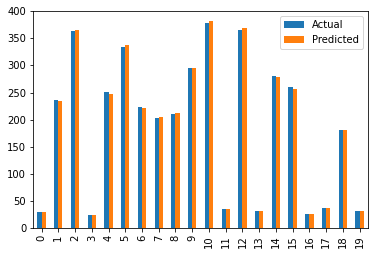

In [33]:
graph.plot(kind='bar')